<a href="https://colab.research.google.com/github/domingues100/SEL0449---Computer-Vision/blob/main/Lista7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de Exercício 7
### Processamento Digital de Imagens (SEL0449/SEL5895)

**Instruções:**

 1. Esta lista consiste em 3 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_7.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_7.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: ` Gabriel Montagni Domingues Filho

`Número USP: ` 11800903

### Introdução:

Vamos importar as bibliotecas que utilizaremos durante essa prática!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática.

In [ ]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_07/image_degrau2.tif", "img_degrau.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")


### 1) Filtragem do ruído não dependente do sinal (3.0/10.0)

Nesta prática, iremos trabalhar um tipo de degração conhecida como ruído. De início, discutiremos sobre um ruído não dependende do sinal. Um dos exemplos desta categoria é o ruído Gaussiano.

<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_07/ruidoGaussiano.gif" style="width:836px;height:266px;" width="980" height="300"></center>

<center><caption><b> Figura 1:</b> Imgens degradadas com diferentes níveis de ruído Gaussiano.</b></caption></center>

As principais fontes de ruídos gaussianos em imagens digitais estão relacionados ao ruído térmico durante a aquisição. Em processamento de imagens digitais, o ruído gaussiano pode ser reduzido utilizando-se técnicas de filtros espaciais, que suavizam os ruídos contidos na imagem, com a desvantagem de borrá-la.

1.1) Para analisar as características dessa degradação, vamos utilizar uma imagem degrau com diferentes níveis de cinza. Siga os passos abaixo:

1. Carregue a imagem "img_degrau.tif".
2. Agora vamos inserir ruído na imagem com desvio padrão = 7. Para isso vamos usar uma função de nome ``` InsertNoiseAWGN``` . Já disponibilizamos o escopo da função e uma descrição das entradas e saídas. Comente o que cada linha da função está exercendo.
3. Mostre, lado a lado, a imagem original, a imagem degradada (ruidosa)  e a imagem contendo somente o ruído Gaussiano (que fora adicionado à imagem original no exercício anterior).

   *   Dica:  Fazendo a subtração da imagem ruidosa pela imagem original, o que sobra é somente o ruído que foi adicionado.
   
4. Calcule a média e variância **sobre cada degrau de cinza** na imagem ruidosa e em seguida plote o gráfico de Média (Eixo X) e Variância (Eixo Y).
5. Comente sobre o comportamento da variância em relação à média.


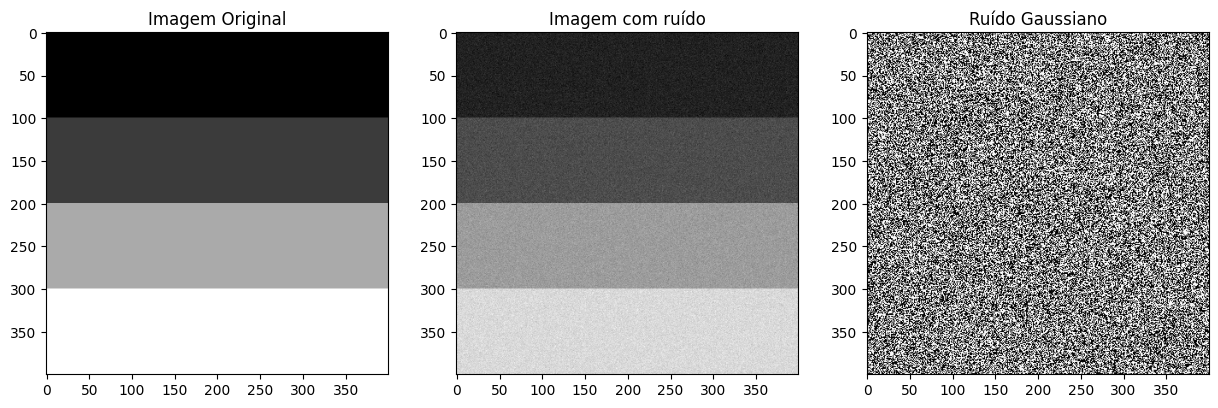

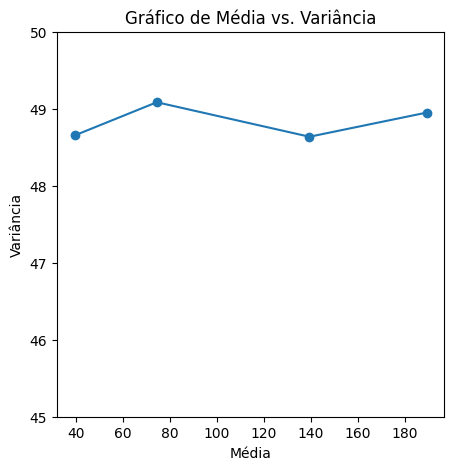

In [ ]:
def InsertNoiseAWGN(img, stdNoise):
  '''
  Entrada:
    - img: Imagem de entrada (uint8).
    - stdNoise: Desvio padrão do ruído.

  Saída:
    - imgNoisy: Imagem com ruído AWGN .
  '''
  nRows, nCols = img.shape #passa para nRown e nCols, as dimensões da imagem
  noise =  stdNoise * np.random.normal(size=(nRows,nCols)).astype(float) #cria uma matriz randomica do tamanho da imagem e multiplica pela variância
  imgNoisy = img + noise  #soma o ruído a imagem original
  imgNoisy = imgNoisy.astype('uint8') #converte para uint8
  return imgNoisy #retorna a imagem com ruído

# Seu código começa aqui #

def plot(imagens, titulos): #função para o plot
  plt.figure(figsize=(5*len(imagens),5)) #cria uma figura 10x5
  for j in range(len(imagens)):
    plt.subplot(1,len(imagens),j+1)
    plt.title(f"{titulos[j]}")
    plt.imshow(imagens[j],'gray')
  plt.show()


img = cv.imread("img_degrau.tif", cv.IMREAD_GRAYSCALE) #lê a imagem original
nRows, nCols = img.shape #dimensoes da imagem
ImgNoisy = InsertNoiseAWGN(img, 7) #cria a função para criar uma imagem com ruído
Ruido = ImgNoisy - img #mostra somente o ruído

plot([img, ImgNoisy, Ruido], ["Imagem Original", "Imagem com ruído", "Ruído Gaussiano"]) #faz os plots lado a lado
print("\n")


# Regioes de interesse
rois = [
    (0, 100, 0, 400),  # ROI 1
    (100, 200, 0, 400), # ROI 2
    (200, 300, 0, 400), # ROI 3
    (300, 400, 0, 400), # ROI 4
]

# Listas para armazenar as médias e variâncias
medias = []
variancias = []

# Calcular as médias e variâncias para cada ROI
for roi in rois:
    x, y, z, w = roi
    regiao = ImgNoisy[x:y, z:w]
    media = np.mean(regiao)
    variancia = np.var(regiao)
    medias.append(media)
    variancias.append(variancia)

# Plotar o gráfico de Média (Eixo X) e Variância (Eixo Y)
plt.figure(figsize=(5,5))
plt.plot(medias, variancias, marker='o', linestyle='-')
plt.xlabel('Média')
plt.ylabel('Variância')
plt.title('Gráfico de Média vs. Variância')
plt.ylim(45, 50)  # Limitar o eixo Y entre 0 e 1000
plt.show()

# Seu código termina aqui #

# Comentários: O gráfico de média e variância mostra que a variância varia pouco com as médias. Geralmente essa variação varia em torno do valor 49/50. Enquanto a média muda mais, visto que as faixas
#tem tons diferentes que vão de mais escuro a mais claro.

1.2) Para realizarmos a filtragem da imagem, utilizaremos a função ```cv.fastNlMeansDenoising``` disponibilizada nas bibliotecas já carregadas. Essa função possui alguns parâmetros de entrada:
```python
ImgFiltrada = cv.fastNlMeansDenoising(ImgRuidosa, h, search_window , block_size)
```
<br>em que h está relacionado com o desvio padrão do ruído na imagem ruidosa, *search_window* é o tamanho da janela de busca e *block_size* o tamanho da janela para matriz de pesos.

1. Faça a filtragem utilizando a função explicada acima. Nesta etapa, utilize h = 7 (desvio padrão do ruído Gaussiano aplicado na imagem), search_window = 7 e  block_size = 4. </br>

2. Mostre lado a lado, a imagem filtrada e a imagem ruidosa.


3. Calcule e mostre a relação sinal ruído (*Signal to Noise Ratio* - SNR) dividindo a média do sinal (μ) pelo desvio padrão (σ) para **cada uma das quatro regiões**. Fazer este cálculo tanto para imagem filtrada quanto para a imagem ruidosa.
$$ SNR = \dfrac{μ}{σ}$$

4.  Calcule o ganho de qualidade da imagem por meio da divisão entre o SNR depois da filtragem com o antes da filtragem. Houve algum ganho?
$$ Ganho =\dfrac{SRN_{depois}}{SRN_{antes}}$$

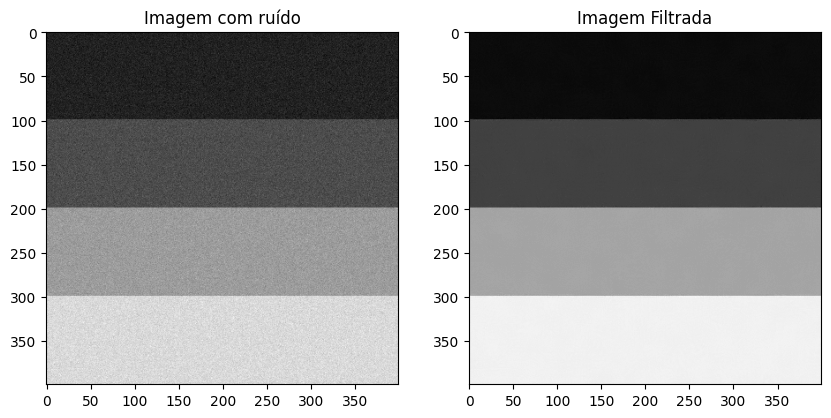



SNR imagem com Ruído
SNR primeira faixa é: 5.660569540995989
SNR segunda faixa é: 10.635737270739028
SNR terceira faixa é: 20.002190004340935
SNR quarta faixa é: 27.0768599161162


SNR imagem filtrada
SNR primeira faixa é: 46.95705162772733
SNR segunda faixa é: 80.06446634258651
SNR terceira faixa é: 155.86751434552548
SNR quarta faixa é: 228.91423817921506


Ganhos
O ganho da primeira faixa é: 8.295464137954065
O ganho da segunda faixa é: 7.5278717689707655
O ganho da terceira faixa é: 7.792522434378368
O ganho da quarta faixa é: 8.454238744388705
O ganho médio total é: 8.017524271422976


In [ ]:
# Seu código começa aqui #
ImgFiltrada = cv.fastNlMeansDenoising(ImgNoisy, 7, 7 , 4)
plot([ImgNoisy, ImgFiltrada], ["Imagem com ruído", "Imagem Filtrada"]) #faz os plots lado a lado

# Regioes de interesse
rois = [(0, 100),  (100, 200), (200, 300), (300, 400)]

# Listas para armazenar as médias e variâncias
medias = []
variancias = []
SNR = []

def calcula_snr(imagem):
# Calcular as médias e variâncias para cada ROI
  for roi in rois:
    x, y = roi
    regiao = imagem[x:y, 0:400]
    media = np.mean(regiao)
    variancia = np.var(regiao)
    medias.append(media)
    variancias.append(variancia)
    SNR.append(media/(variancia**0.5))

calcula_snr(ImgNoisy) #calcula o snr da imagem com ruído
calcula_snr(ImgFiltrada) #calcula o snr da imagem filtrada

print("\n")
print("SNR imagem com Ruído")
print("SNR primeira faixa é:", SNR[0])
print("SNR segunda faixa é:", SNR[1])
print("SNR terceira faixa é:", SNR[2])
print("SNR quarta faixa é:", SNR[3])

print("\n")
print("SNR imagem filtrada")
print("SNR primeira faixa é:", SNR[4])
print("SNR segunda faixa é:", SNR[5])
print("SNR terceira faixa é:", SNR[6])
print("SNR quarta faixa é:", SNR[7])

print("\n")
print("Ganhos")
print("O ganho da primeira faixa é:", SNR[4]/SNR[0])
print("O ganho da segunda faixa é:", SNR[5]/SNR[1])
print("O ganho da terceira faixa é:", SNR[6]/SNR[2])
print("O ganho da quarta faixa é:", SNR[7]/SNR[3])
print("O ganho médio total é:", np.mean((SNR[4]/SNR[0])+(SNR[5]/SNR[1])+(SNR[6]/SNR[2])+(SNR[7]/SNR[3]))/4)
# Seu código termina aqui #

# Comentários: Houve bastante ganho, basta comparar a imagem com ruído e a imagem filtrada. O Ganho fiicou na casa de 7/8 e resultou em um valor médio de 7.71.

### 2) Filtragem do Ruído dependente do sinal (Poisson) (3.5/10.0)

Agora vamos trabalhar com um tipo de ruído que possui dependência com sinal: o ruído Poisson.

<center><img src="https://raw.githubusercontent.com/LAVI-USP/SEL0449-SEL5895_2023/main/imagens/pratica_07/RuidoPoisson.gif" style="width:836px;height:266px;" width="980" height="300"></center>

<center><caption><b> Figura 1:</b> Imgens degradadas com diferentes níveis de ruído Poisson.</b></caption></center>

Esse ruído é comumente encontrado em dispositivos que se valem da contagem de fótons para a aquisição de imagem, como por exemplo exames de raios X (mamografia, tomografia, fluoroscopia e etc). De forma geral, quanto mais fótons contados pelos detectores, maior será o valor de intensidade do pixel. Contudo, devido à variação no número de fótons detectados, o valor de um pixel é influenciado por uma degradação cuja variância é proporcional à intensidade de luz captada por aquele pixel.

2.1) Para entendermos melhor esse tipo de ruído, siga as instruções abaixo:

1. Insira ruído Poisson na imagem degrau. Para isso vamos usar uma função de nome ```InsertNoisePoisson```. Já disponibilizamos o escopo da função e uma descrição das entradas e saídas. Comente o que cada linha da função está exercendo.
2. Mostre, lado a lado, a imagem original, a imagem degradada e a imagem contendo somente o ruído Poisson (que fora adicionado à imagem original).
3. Calcule a média e variância sobre cada degrau de cinza para a imagem ruidosa. Em seguida plote o gráfico de Média (Eixo X) e Variância (Eixo Y).
4. Comente sobre o comportamento da variância em relação à média. Faça um comparativo em relação ao exercício 1.1 .

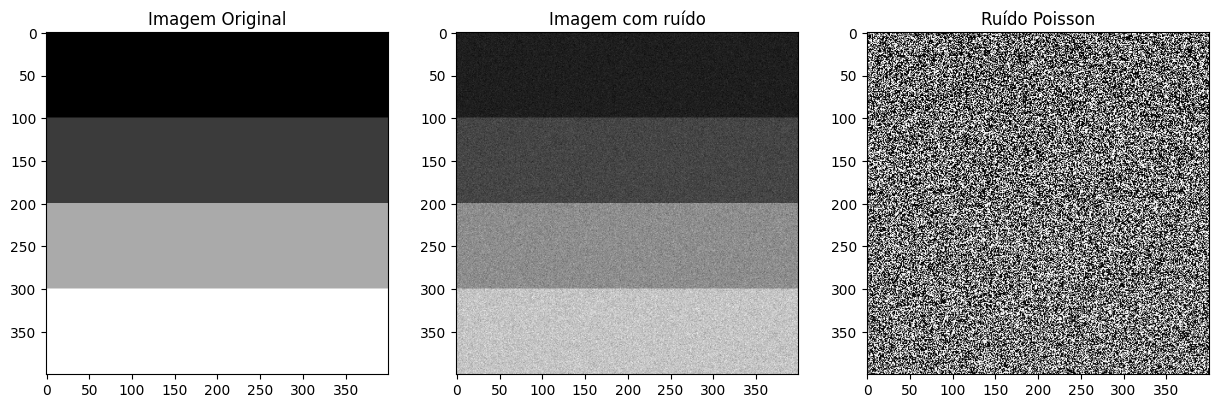

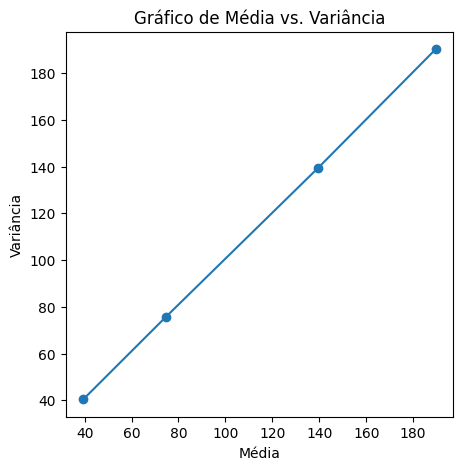

In [ ]:
def InsertNoisePoisson(img):
  '''
  Entrada:
    - img: Imagem de entrada (uint8).

  Saída:
    - imgNoisy: Imagem com ruído Poisson .
  '''
  nRows, nCols = img.shape #com o .shape passa as linhas e colunas para as variáveis
  poissonNoise = np.sqrt(1*img)*np.random.normal(size=(nRows,nCols)) #aplica o ruido de poisson, ainda cria um ruido aleatório e multiplica ele pela raiz quadrada da imagem
  imgNoisy = img + poissonNoise #cria a imagem com ruido somando a original ao ruido
  imgNoisy = imgNoisy.astype('uint8') #converte para uint8
  return imgNoisy

# Seu código começa aqui #
ImgNoisyPoisson = InsertNoisePoisson(img) #usa a função de poisson
RuidoPoisson = img - ImgNoisyPoisson #acha o ruído

plot([img, ImgNoisyPoisson, RuidoPoisson], ["Imagem Original", "Imagem com ruído", "Ruído Poisson"]) #faz os plots lado a lado
print("\n")

# Regioes de interesse
rois = [(0, 100),  (100, 200), (200, 300), (300, 400)]

# Listas para armazenar as médias e variâncias
medias = []
variancias = []

#para cada rois faz as contas de media e variancia e coloca nas listas
for roi in rois:
    x, y = roi
    regiao = ImgNoisyPoisson[x:y, 0:400]
    media = np.mean(regiao)
    variancia = np.var(regiao)
    medias.append(media)
    variancias.append(variancia)

# Plotar o gráfico de Média (Eixo X) e Variância (Eixo Y)
plt.figure(figsize=(5,5))
plt.plot(medias, variancias, marker='o', linestyle='-')
plt.xlabel('Média')
plt.ylabel('Variância')
plt.title('Gráfico de Média vs. Variância')
plt.show()
# Seu código termina aqui #

# Comentários: Nesse exercício a variância comportou-se totalmente diferente do primeiro. Nesse caso, vemos que a variância varia o mesmo tanto que a média, formando uma reta
#com inclinação 45°. No primeiro exercício, esse comportamento tendia a uma reta com inclinação 0°. A principal diferença evidenciada é a mudança de comportamento entro os
#ruídos utilizados.

2.2) Utilizando a função “cv.fastNlMeansDenoising”, com os mesmos parâmetros de filtragem da questão 1.2 :

1. Faça a filtragem da imagem.
```python
ImgFiltrada = cv.fastNlMeansDenoising(ImgRuidosa, 7, 7, 4)
```

2. Mostre lado a lado, a imagem filtrada e a ruidosa.

3. Calcule e mostre a relação sinal ruído (*Signal Noise Ratio* - SNR) dividindo a média do sinal (μ) pelo desvio padrão (σ) para cada uma das quatro regiões. Fazer esse cálculo tanto para imagem filtrada quanto para a imagem ruidosa.

4.  Calcule o ganho de qualidade da imagem por meio da divisão entre o SNR depois da filtragem com o antes da filtragem. O que se pode concluir ao comparar com o resultado do item 4 da questão 1.2?


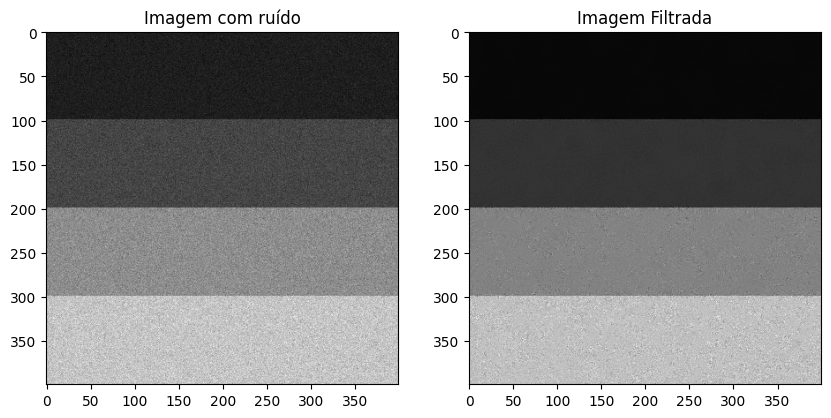



SNR imagem com Ruído
SNR primeira faixa é: 6.205599965643583
SNR segunda faixa é: 8.572213178407017
SNR terceira faixa é: 11.812594982549271
SNR quarta faixa é: 13.748720674447558


SNR imagem filtrada
SNR primeira faixa é: 56.409432305476216
SNR segunda faixa é: 42.052914214878854
SNR terceira faixa é: 24.19694332299837
SNR quarta faixa é: 18.190326867194486


O ganho da primeira faixa é: 9.090085183991713
O ganho da segunda faixa é: 4.905724267428169
O ganho da terceira faixa é: 2.048402011475419
O ganho da quarta faixa é: 1.3230559626541687
O ganho médio total é: 4.341816856387367


In [ ]:
# Seu código começa aqui #
ImgFiltrada2 = cv.fastNlMeansDenoising(ImgNoisyPoisson, 7, 7 , 4)
plot([ImgNoisyPoisson, ImgFiltrada2], ["Imagem com ruído", "Imagem Filtrada"]) #faz os plots lado a lado

# Regioes de interesse
rois = [(0, 100), (100, 200), (200, 300), (300, 400)]

# Listas para armazenar as médias e variâncias
medias = []
variancias = []
SNR = []

calcula_snr(ImgNoisyPoisson) #calcula o snr da imagem com ruído
calcula_snr(ImgFiltrada2) #calcula o snr da imagem filtrada

print("\n")
print("SNR imagem com Ruído")
print("SNR primeira faixa é:", SNR[0])
print("SNR segunda faixa é:", SNR[1])
print("SNR terceira faixa é:", SNR[2])
print("SNR quarta faixa é:", SNR[3])

print("\n")
print("SNR imagem filtrada")
print("SNR primeira faixa é:", SNR[4])
print("SNR segunda faixa é:", SNR[5])
print("SNR terceira faixa é:", SNR[6])
print("SNR quarta faixa é:", SNR[7])

print("\n")
print("O ganho da primeira faixa é:", SNR[4]/SNR[0])
print("O ganho da segunda faixa é:", SNR[5]/SNR[1])
print("O ganho da terceira faixa é:", SNR[6]/SNR[2])
print("O ganho da quarta faixa é:", SNR[7]/SNR[3])
print("O ganho médio total é:", np.mean((SNR[4]/SNR[0])+(SNR[5]/SNR[1])+(SNR[6]/SNR[2])+(SNR[7]/SNR[3]))/4)
# Seu código termina aqui #

# Comentários: Nesse caso, o ganho diminui com o passar das faixas, decrescendo de 9 para 1 e tendo média de 4. No item 4 da questão 1.2, esse ganho era próximo de 8 e era praticamente
# o mesmo ao longo das faixas.

### 3) Filtragem de Ruído Poisson utilizando Transformada de Anscombe (3.5/10.0)

Nesta terceira parte, vamos apresentar uma outra forma de filtragem utilizando uma ferramenta de establização de variância. Para esse caso, utilizaremos a transformada de Anscombe. Siga os passos abaixo:

1. Insira ruído Poisson na imagem degrau.
2. Aplique sobre a imagem degradada a estabilização da variância por meio da transformada de Anscombe, segundo a fórmula :


$$ f(z) = 2 (z + 3/8 )^{1/2} $$

<br>onde f(z) é a imagem no domínio de Anscombe e 'z' é a imagem ruidosa, que será estabilizada.</br>

3. Calcule a média e variância sobre cada degrau de cinza da imagem ***f(z)***, pós estabilização. Comente sobre o comportamento da variância em relação às diferentes médias quando utiliza-se a transformada de Anscombe.

4. Após a aplicação da transformada de Anscombe, o ruído passou a ser independente do sinal e com variância igual a 1. Dessa forma, ao utilizarmos a função “cv.fastNlMeansDenoising”, o parâmetro 'h' deve ser igual a 1. Faça a filtragem da imagem no domínio de Anscombe com os parâmetros sugeridos abaixo:
```python
ImgFiltrada = cv.fastNlMeansDenoising(ImgRuidosa, 1, 7, 4)
```

5. Como a imagem filtrada está no domínio de Anscombe, é necessário retorná-la para o domínio inicial da imagem. Portanto, aplique a transformada inversa de Anscombe:

$$ I(D) = (D/2)^{2} - 1/8 $$<br/>

onde I(D) é a imagem filtrada no domínio de original e 'D' é a imagem  filtrada no domínio de Anscombe.

6. Mostre lado a lado, a imagem filtrada e a ruidosa.

7. Calcule e mostre a relação sinal ruído (*Signal Noise Ratio* - SNR) dividindo a média do sinal (μ) pelo desvio padrão (σ) para cada uma das três regiões. Fazer este cálculo tanto para imagem filtrada quanto para a imagem ruidosa.

8.  Calcule o ganho de qualidade da imagem por meio da divisão entre o SNR depois da filtragem com o antes da filtragem. O que se pode concluir ao comparar com o resultado da questão 2.2?

9. Compare a imagem filtrada (obtida neste exercício) com a imagem filtrada do exercício 2.2 e comente os resultados.




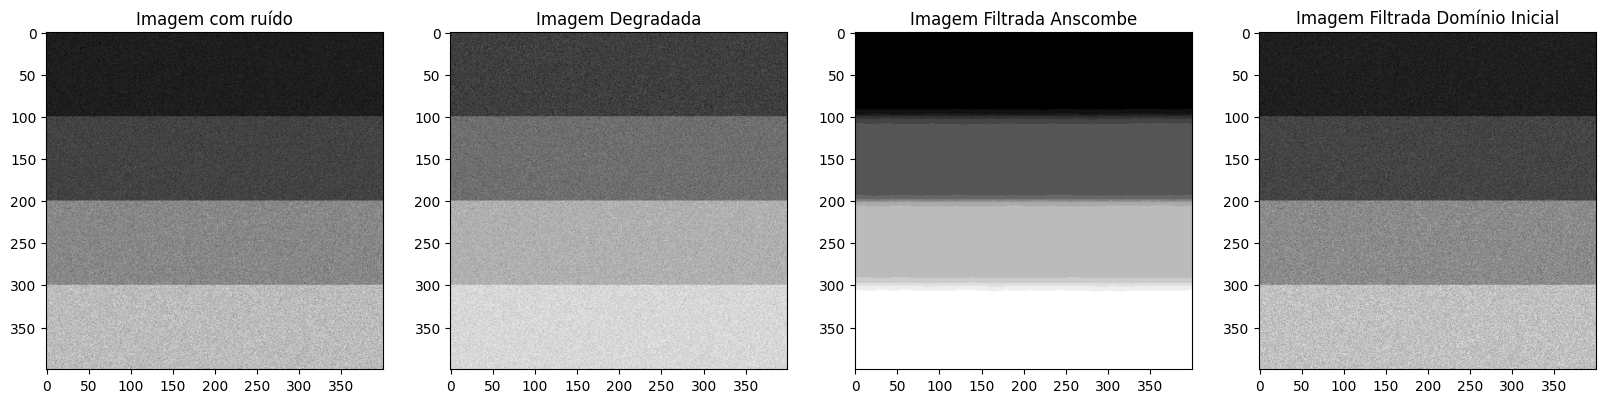

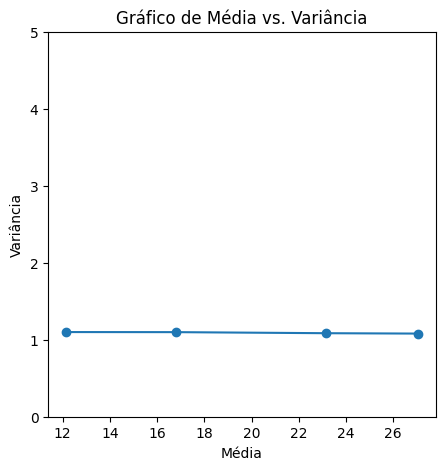



Imagem Ruidosa
O SNR primeira faixa é: 6.264442355013307
O SNR da segunda faixa é: 8.569817796025513
O SNR da terceira faixa é: 11.800966513331984
O SNR da quarta faixa é: 13.77961674458581
O SNR médio total é: 9.425044520849987


Imagem Filtrada
O SNR da primeira faixa é: 5.855152470468843
O SNR da segunda faixa é: 8.061659860298741
O SNR da terceira faixa é: 11.151398649348831
O SNR da quarta faixa é: 13.042209570883227
O SNR médio total é: 9.52760513774991


Ganho da qualidade de imagem
O ganho da primeira faixa é: 0.9346645940133973
O ganho da segunda faixa é: 0.9407037643247861
O ganho da terceira faixa é: 0.9449563844411123
O ganho da quarta faixa é: 0.946485654327627
O ganho médio total é: 0.9417025992767307


In [ ]:
# Seu código começa aqui #
imgRuidosa = InsertNoisePoisson(img) #imagem com ruido Poisson
Anscombe = 2*(imgRuidosa+(3/8))**0.5
Anscombe = Anscombe.astype(np.uint8)

ImgAnscombe = cv.fastNlMeansDenoising(Anscombe, 1, 7, 4)

Anscombe_inversa= ((Anscombe/2)**2)-1/8

plot([imgRuidosa, Anscombe, ImgAnscombe, Anscombe_inversa],["Imagem com ruído", "Imagem Degradada", "Imagem Filtrada Anscombe", "Imagem Filtrada Domínio Inicial"])

# Regioes de interesse
rois = [(0, 100),  (100, 200), (200, 300), (300, 400)]

# Listas para armazenar as médias e variâncias
medias = []
variancias = []
SNR = []

def calcula_snr(imagem):
# Calcular as médias e variâncias para cada ROI
  for roi in rois:
    x, y = roi
    regiao = imagem[x:y, 0:400]
    media = np.mean(regiao)
    variancia = np.var(regiao)
    medias.append(media)
    variancias.append(variancia)
    SNR.append(media/(variancia**0.5))

calcula_snr(Anscombe) #calcula o snr da imagem com ruído

print("\n")
# Plotar o gráfico de Média (Eixo X) e Variância (Eixo Y)
plt.figure(figsize=(5,5))
plt.plot(medias, variancias, marker='o', linestyle='-')
plt.xlabel('Média')
plt.ylabel('Variância')
plt.title('Gráfico de Média vs. Variância')
plt.ylim(0, 5)  # Limitar o eixo Y entre 0 e 1000
plt.show()

medias.clear()
variancias.clear()
SNR.clear()

calcula_snr(imgRuidosa) #calcula o snr da imagem com ruído
calcula_snr(Anscombe_inversa) #calcula o snr da imagem filtrada

print("\n")
print("Imagem Ruidosa")
print("O SNR primeira faixa é:", SNR[0])
print("O SNR da segunda faixa é:", SNR[1])
print("O SNR da terceira faixa é:", SNR[2])
print("O SNR da quarta faixa é:", SNR[3])
print("O SNR médio total é:", (SNR[0]+SNR[2]+SNR[3]+SNR[4])/4)

print("\n")
print("Imagem Filtrada")
print("O SNR da primeira faixa é:", SNR[4])
print("O SNR da segunda faixa é:", SNR[5])
print("O SNR da terceira faixa é:", SNR[6])
print("O SNR da quarta faixa é:", SNR[7])
print("O SNR médio total é:", (SNR[4]+SNR[5]+SNR[6]+SNR[7])/4)


print("\n")
print("Ganho da qualidade de imagem")
print("O ganho da primeira faixa é:", SNR[4]/SNR[0])
print("O ganho da segunda faixa é:", SNR[5]/SNR[1])
print("O ganho da terceira faixa é:", SNR[6]/SNR[2])
print("O ganho da quarta faixa é:", SNR[7]/SNR[3])
print("O ganho médio total é:", np.mean((SNR[4]/SNR[0])+(SNR[5]/SNR[1])+(SNR[6]/SNR[2])+(SNR[7]/SNR[3]))/4)
# Seu código termina aqui #

# Comentários: Nesse caso, a variância após a transformada de Anscombe ficou em 1, independetemente da média. Uma mudança drástica quando comparada aos casos anteriores, os quais
# tiveram uma variância bem maior. Nesse caso tivemos o menor ganho, a imagem filtrada no domínio inicial ainda parace com a imagem com ruído. Porém no domínio Anscombe ela parece melhor que as demais.
# No exercicío 2.2 a imagem ficou melhor filtrada do que neste. Isso confirma-se pelo ganho, aqui o ganho ficou em 1 para cada região. Enquanto no 2.2, esse ganhou variu com as faixas, mas teve valor médio
# 4, sendo relativamente maior do que este.